---
layout: default
title: 我的Blog
---

  
# SD212: Graph mining
## Lab 1: Sampling nodes and edges

You will learn to:
* use the networkx package
* sample nodes / edges

You **must** be connected to Telecom ParisTech network!

## Getting started

In [1]:
from connector import Connector
from operator import itemgetter
from itertools import combinations
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
base_url = 'http://137.194.192.13:8234'
lab_id = 'lab1'

## To do

* Enter your login and test it using question #0
* Answer question #1 **(0.5 point)**

In [4]:
# Enter your login (family name + first letter of first name)
# Marie Curie -> curiem
login = 'zhuf'

In [5]:
connector = Connector(base_url, lab_id, login)
get_question = connector.get_question
post_answer = connector.post_answer
post_text = connector.post_text

In [6]:
get_question(0)

This lab has ended.


In [11]:
arg = get_question(1)
print(arg)

This lab has ended.
None


In [12]:
# To be modified
answer = sum(arg['sequence'])

TypeError: 'NoneType' object is not subscriptable

In [9]:
post_answer(1, answer)

NameError: name 'answer' is not defined

## 1. The networkx package

In [10]:
import networkx as nx

The documentation is available [here](https://networkx.readthedocs.io/en/stable/).

In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
import numpy as np

### First graph

In [21]:
# Building the graph
G = nx.Graph(name = "My first graph")
G.add_edge(1,2)
G.add_edge(2,3)

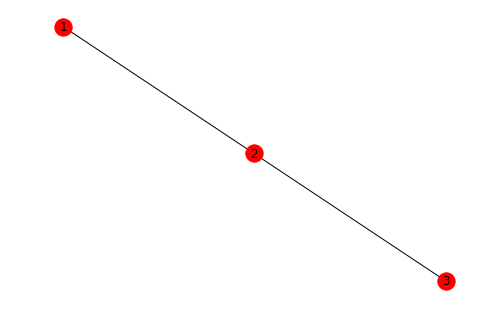

In [22]:
# Visualization
nx.draw(G,with_labels = True)

In [23]:
# Summary
print (nx.info(G))

Name: My first graph
Type: Graph
Number of nodes: 3
Number of edges: 2
Average degree:   1.3333


In [58]:
# List of nodes 
nodes = list(G.nodes())
print(nodes)

[1, 2, 3]


In [59]:
# Iterator on nodes
for u in G.nodes():
    print (u)

1
2
3


In [31]:
# First node through the list / the iterator
nodes_iter = iter(G.nodes())
nodes[0], next(nodes_iter)

(1, 1)

## To do

* Get the second node using the list and the iterator
* Get the first edge using the list of edges and the iterator on edges

In [60]:
nodes[1], next(nodes_iter)

(2, 2)

In [61]:
edges_iter = iter(G.edges())
edges = list(G.edges())

In [62]:
edges[0], next(edges_iter)

((1, 2), (1, 2))

### Second graph

In [63]:
# Building the graph
G = nx.Graph(name = "A social graph")
G.add_edge('Albert','Barbara')
G.add_edge('Albert','Carol')
G.add_edge('Barbara','Dan')
G.add_edge('Albert','Dan')

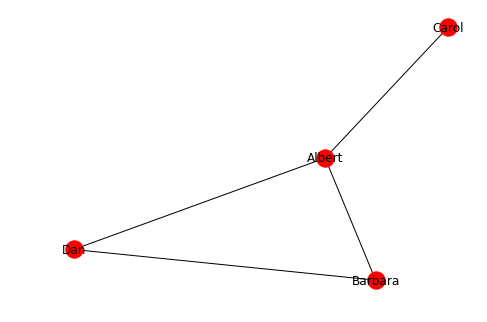

In [64]:
# Visualization
nx.draw(G, with_labels = True)

In [24]:
# Summary
print (nx.info(G))

Name: My first graph
Type: Graph
Number of nodes: 3
Number of edges: 2
Average degree:   1.3333


In [65]:
# List of nodes / edges
print (G.nodes())
print (G.edges())

['Albert', 'Barbara', 'Carol', 'Dan']
[('Albert', 'Barbara'), ('Albert', 'Carol'), ('Albert', 'Dan'), ('Barbara', 'Dan')]


In [75]:
# Node degree
G.degree('Albert')

3

In [76]:
# Neighbors
for u in G.neighbors('Albert'):
    print(u)

Barbara
Carol
Dan


In [77]:
# List of node degrees
degrees = [G.degree(u) for u in G.nodes()]
degrees

[3, 3, 1, 3, 2]

In [78]:
# Data structure (dictionary of dictionaries)
for u in G.nodes():
    print (u, G[u])

Albert {'Barbara': {}, 'Carol': {}, 'Dan': {}}
Barbara {'Albert': {}, 'Dan': {}, 'Evelyn': {}}
Carol {'Albert': {}}
Dan {'Barbara': {}, 'Albert': {}, 'Evelyn': {}}
Evelyn {'Barbara': {}, 'Dan': {}}


In [79]:
# Modifying the graph
edges = [('Barbara','Evelyn'),('Evelyn','Dan')]
G.add_edges_from(edges)

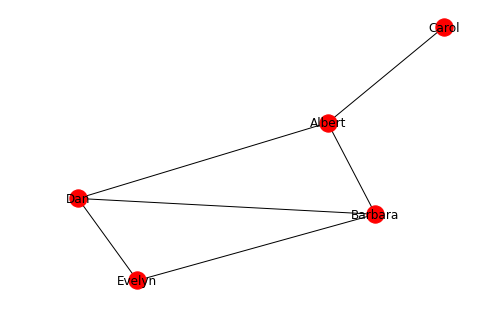

In [80]:
# Visualization
nx.draw(G,with_labels = True)

### Layout

The layout allows you to visualize the graph (in 2D).

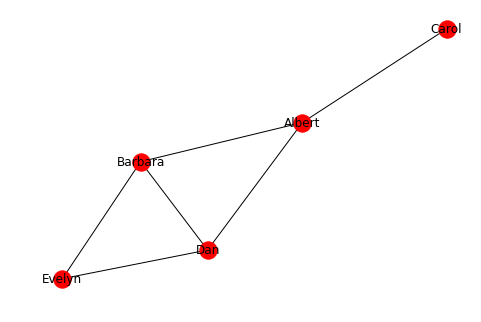

In [88]:
# Layout based on springs
pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels = True)

In [89]:
print (pos)

{'Albert': array([0.32852818, 0.22927369]), 'Barbara': array([-0.4253268 ,  0.03337831]), 'Carol': array([1.        , 0.69743058]), 'Dan': array([-0.11327652, -0.40825137]), 'Evelyn': array([-0.78992486, -0.55183121])}


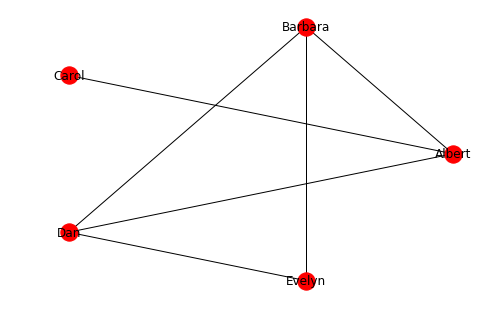

In [94]:
# Another layout
pos = nx.circular_layout(G)
nx.draw(G,pos,with_labels = True)

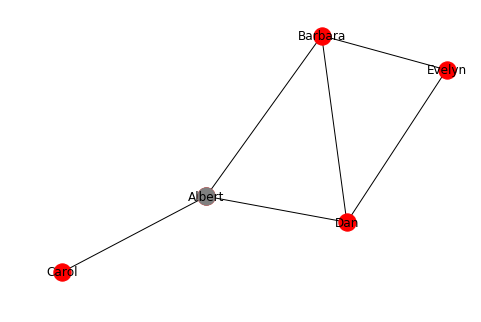

In [102]:
# Changing the color of some nodes
pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels = True)
nodes = nx.draw_networkx_nodes(G,pos,nodelist = ['Albert'],node_color='grey')

### Node labels

In [103]:
# Embedding the positions
for u in G.nodes():
    G.node[u]['pos_x'] = float(pos[u][0])
    G.node[u]['pos_y'] = float(pos[u][1])

In [104]:
for u in G.nodes():
    print (u, G.node[u])

Albert {'pos_x': -0.32902872430569724, 'pos_y': -0.08768503264963824}
Barbara {'pos_x': 0.20966875266024693, 'pos_y': 0.2920576112129727}
Carol {'pos_x': -1.0, 'pos_y': -0.2664995408057988}
Dan {'pos_x': 0.3272036631732645, 'pos_y': -0.14898078788765312}
Evelyn {'pos_x': 0.7921563084721858, 'pos_y': 0.21110775013011712}


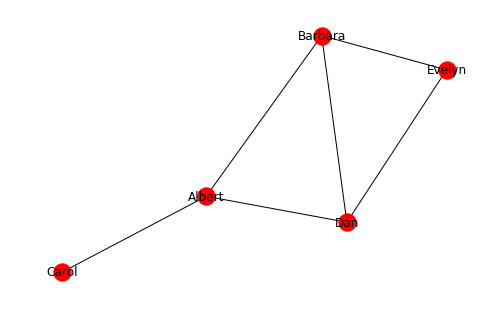

In [108]:
pos_x = nx.get_node_attributes(G,'pos_x')
pos_y = nx.get_node_attributes(G,'pos_y')
pos = {u: (pos_x[u], pos_y[u]) for u in G.nodes()}
nx.draw(G,pos,with_labels = True)

In most cases, the $n$ nodes are indexed from 0 to $n-1$. The name of each node (if any) is then stored as a label.

In [109]:
# Using node indices
names = list(G.nodes())
G = nx.convert_node_labels_to_integers(G)

In [110]:
# Embedding the names 
for i in G.nodes():
    G.node[i]['name'] = names[i]

In [111]:
for u in G.nodes():
    print (u, G.node[u])

0 {'pos_x': -0.32902872430569724, 'pos_y': -0.08768503264963824, 'name': 'Albert'}
1 {'pos_x': 0.20966875266024693, 'pos_y': 0.2920576112129727, 'name': 'Barbara'}
2 {'pos_x': -1.0, 'pos_y': -0.2664995408057988, 'name': 'Carol'}
3 {'pos_x': 0.3272036631732645, 'pos_y': -0.14898078788765312, 'name': 'Dan'}
4 {'pos_x': 0.7921563084721858, 'pos_y': 0.21110775013011712, 'name': 'Evelyn'}


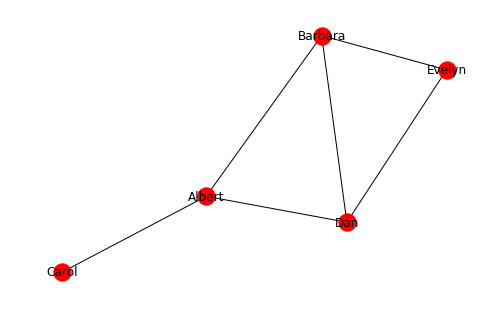

In [112]:
pos_x = nx.get_node_attributes(G,'pos_x')
pos_y = nx.get_node_attributes(G,'pos_y')
pos = {u: (pos_x[u], pos_y[u]) for u in G.nodes()}
names = nx.get_node_attributes(G,'name')
nx.draw(G, pos, labels = names)

### Edge labels

In [113]:
# Adding weights
for u,v in G.edges():
    G[u][v]['weight'] = np.random.randint(1,10)

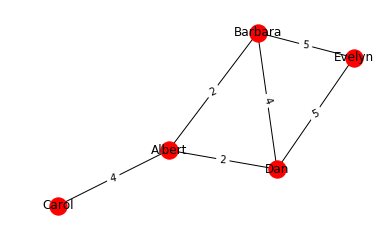

In [119]:
# Visualization with edge weights
weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = weights)
nx.draw(G, pos, labels = names)

In [125]:
weights

{(0, 1): 2, (0, 2): 4, (0, 3): 2, (1, 3): 4, (1, 4): 5, (3, 4): 5}

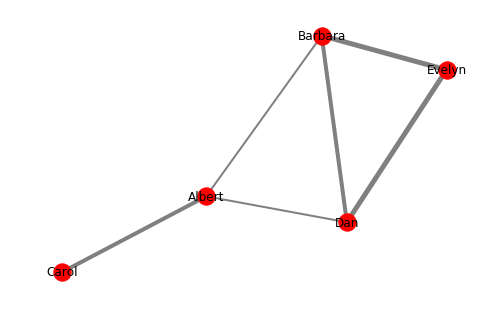

In [126]:
# Visualization with edge widths equal to edge weights
weights_list = [weights[e] for e in G.edges()]
nx.draw(G, pos, labels = names, width = weights_list, edge_color = 'grey')

In [128]:
# Adding categories
categories = ['Family', 'Work', 'Friend']
for u,v in G.edges():
    G[u][v]['category'] = str(np.random.choice(categories))

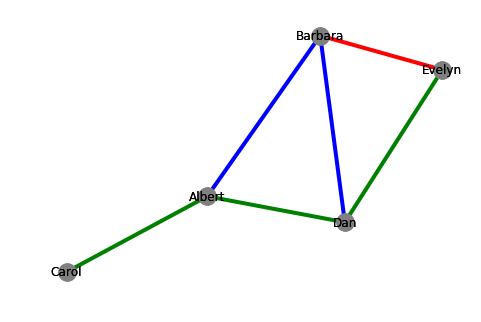

In [130]:
# Visualization with categories
nx.draw(G, pos, labels = names, node_color = 'grey')

color_map = {'Family': 'b', 'Work': 'r', 'Friend': 'g'}

categories = nx.get_edge_attributes(G, 'category')

edgelists = {}
for u, category in categories.items():
    edgelists.setdefault(category, []).append(u)

nx.draw(G, pos, labels = names, node_color = 'gray')
for category in edgelists:
    edges = nx.draw_networkx_edges(G, pos, edgelist = edgelists[category], width = 4, edge_color = color_map[category])
show()

### Directed graphs

In [26]:
# Building the graph
edges = [(1,3),(3,2),(1,3),(1,4),(3,5),(2,4),(2,5),(4,3),(5,4),(5,6),(6,1)]
DiG = nx.DiGraph(edges)
DiG.graph['name'] = "A directed graph"

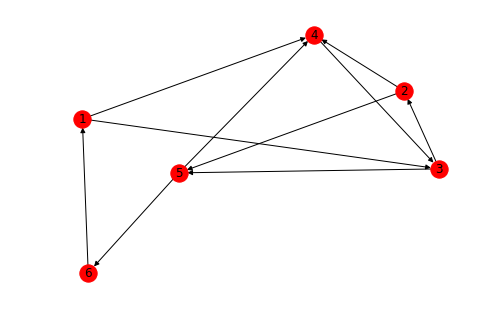

In [27]:
# Visualization
pos = nx.spring_layout(DiG)
nx.draw(DiG,pos,with_labels = True)

In [28]:
# Summary
print (nx.info(DiG))

Name: A directed graph
Type: DiGraph
Number of nodes: 6
Number of edges: 10
Average in degree:   1.6667
Average out degree:   1.6667


### Writing and reading graphs

The `networkx` package allows you to write and read graphs in many formats. We'll use the `graphml` format. 

Observe that both node and edge labels are included.

In [135]:
nx.write_graphml(G, "simple_graph.graphml")

In [136]:
# Specify node_type = int when using node indices 
H = nx.read_graphml("simple_graph.graphml", node_type = int)

In [137]:
print(nx.info(H))

Name: A social graph
Type: Graph
Number of nodes: 5
Number of edges: 6
Average degree:   2.4000


In [138]:
for u in H.nodes():
    print (H.node[u])

{'pos_x': -0.32902872430569724, 'pos_y': -0.08768503264963824, 'name': 'Albert'}
{'pos_x': 0.20966875266024693, 'pos_y': 0.2920576112129727, 'name': 'Barbara'}
{'pos_x': -1.0, 'pos_y': -0.2664995408057988, 'name': 'Carol'}
{'pos_x': 0.3272036631732645, 'pos_y': -0.14898078788765312, 'name': 'Dan'}
{'pos_x': 0.7921563084721858, 'pos_y': 0.21110775013011712, 'name': 'Evelyn'}


In [139]:
for u,v in H.edges():
    print (H[u][v])

{'weight': 2, 'category': 'Family'}
{'weight': 4, 'category': 'Friend'}
{'weight': 2, 'category': 'Friend'}
{'weight': 4, 'category': 'Family'}
{'weight': 5, 'category': 'Work'}
{'weight': 5, 'category': 'Friend'}


## To do

Answer question #2 **(0.5 point)**

In [155]:
arg = get_question(2)
print(arg)

What is the maximum degree in the graph given in the argument?
 (Use nx.from_edgelist to load the graph)
{'edge_list': [[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [1, 2], [1, 4], [1, 7], [1, 9], [2, 5], [2, 9], [3, 6], [3, 7], [3, 8], [4, 5], [4, 8], [4, 9], [5, 7], [5, 8], [6, 7], [6, 9], [7, 8]]}


In [160]:
myG = nx.from_edgelist(arg['edge_list'])
maxD = 0
for node in myG.nodes():
    if myG.degree(node) > maxD:
        maxD = myG.degree(node)

In [161]:
# to be modified
answer = maxD

In [162]:
post_answer(2, answer)

This is correct!


## 2. Datasets

You will now work on the following two real datasets, to be downloaded [here](http://perso.telecom-paristech.fr/~bonald/graphs/lab1.zip).

|Dataset|Type|Weights|Node labels|Node positions|#nodes|#edges|
|:-|:-|:-:|:-:|:-:|:-:|:-:|:-
|OpenStreet|Directed|Yes|No|Yes|6 025|8 170
|OpenFlights|Undirected|Yes|Yes|Yes|3 097|18 193

### OpenStreet

OpenStreet is a graph of streets in the center of Paris. Nodes correspond to intersections. The graph is directed due to one-way streets. Weights correspond to distances between intersections  (in meters). Source: [Open Street Map](http://openstreetmap.fr)

In [221]:
# First download the datasets!
G = nx.read_graphml("openstreet.graphml", node_type = int)

In [164]:
print (nx.info(G))

Name: openstreet
Type: DiGraph
Number of nodes: 6025
Number of edges: 8170
Average in degree:   1.3560
Average out degree:   1.3560


In [165]:
# Get positions
pos_x = nx.get_node_attributes(G,'pos_x')
pos_y = nx.get_node_attributes(G,'pos_y')
pos = {u: (pos_x[u], pos_y[u]) for u in G.nodes()}

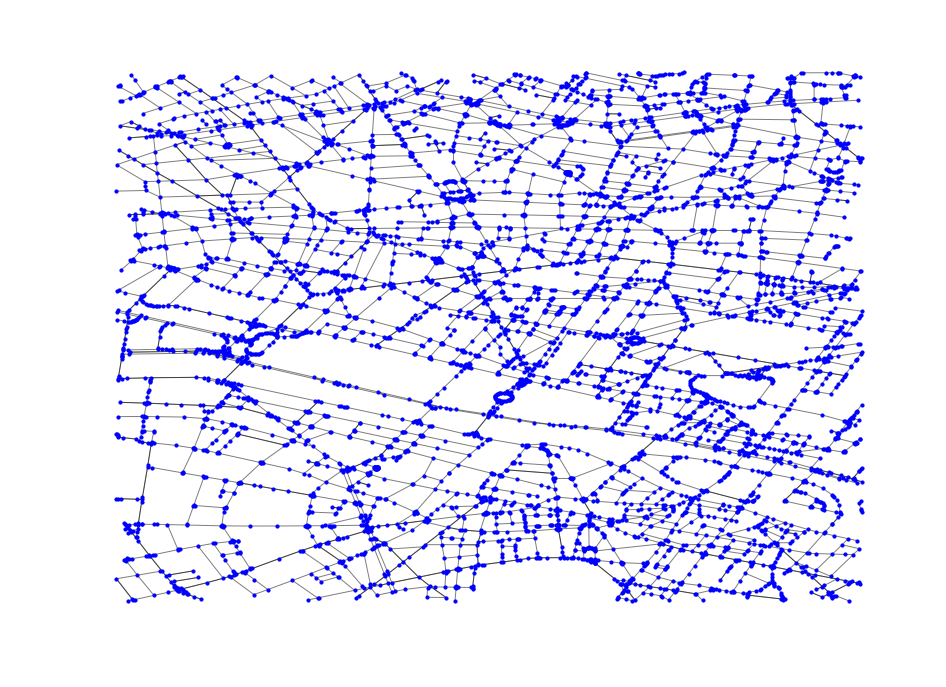

In [166]:
# Visualization
figure(figsize=(16,12))
axis('off')
nx.draw_networkx_nodes(G, pos, node_size = 10, node_color = 'b')
edges = nx.draw_networkx_edges(G, pos, arrows = False, alpha = 0.5)
show()

In [170]:
# A shortest path 
path = nx.shortest_path(G, 0, 1000, weight = 'weight')

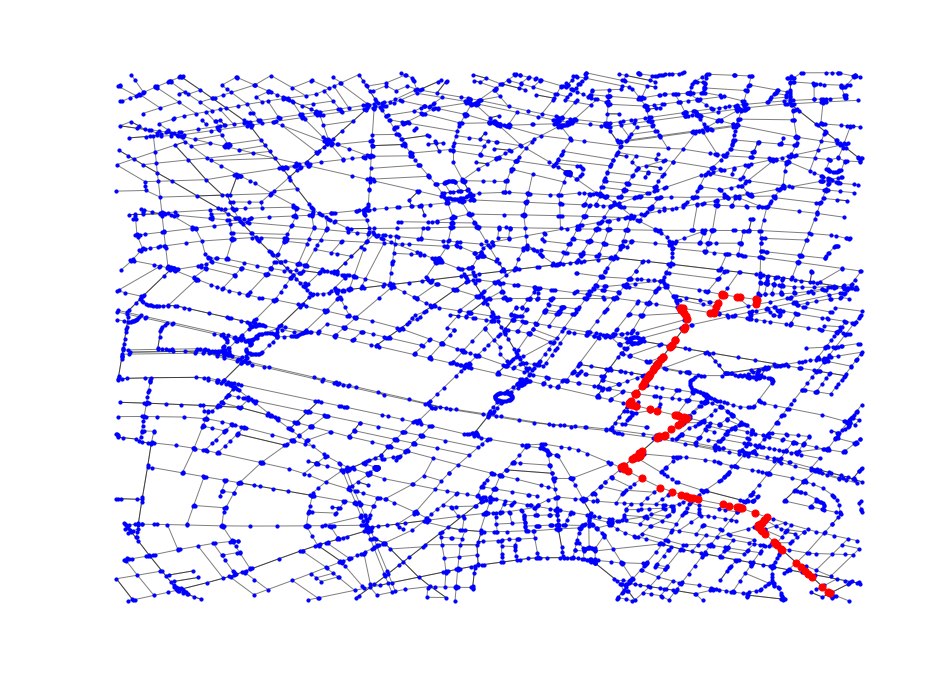

In [171]:
# Visualization
figure(figsize=(16,12))
axis('off')
nx.draw_networkx_nodes(G, pos, node_size = 10, node_color = 'b')
nx.draw_networkx_nodes(G, pos, nodelist = path, node_size = 50, node_color = 'r')
edges = nx.draw_networkx_edges(G, pos, arrows = False, alpha = 0.5)
show()

## To do

* Show the shortest path from Pantheon to Gare Saint Lazare
* Check your answer using question #3 **(1 point)**

[370, 5085, 97, 5090, 322, 314, 313, 2347, 312, 2231, 3442, 92, 3443, 2230, 2207, 5875, 2030, 93, 5052, 28, 388, 5877, 5013, 389, 5858, 5015, 390, 5011, 5016, 5014, 5012, 2343, 2303, 5844, 450, 190, 451, 5846, 5894, 100, 2342, 5895, 2924, 5782, 2133, 2404, 2407, 2394, 2410, 2408, 2409, 5785, 5786, 2493, 5144, 2411, 2497, 5145, 5148, 2500, 2428, 4742, 822, 4744, 5150, 48, 5151, 819, 818, 4322, 817, 4324, 8, 2651, 805, 4327, 795, 55, 2509, 792, 3532, 3311, 4346, 3530, 799, 3312, 3313, 4355, 90, 2654, 4356, 4365, 728, 4372, 727, 4385, 3784, 3786, 89, 4398, 737, 4404, 6025, 4467, 2538, 87, 4499, 1959, 549, 4531, 4551, 664, 4556, 663, 677, 4583, 676, 4585, 679, 5533, 678, 5534, 4647, 4680, 4684, 1893, 4701, 3588, 2900, 3053, 3054, 1151, 1149, 1148, 3282, 4985, 2848, 5983, 79, 2850, 3285, 129, 1572, 4986, 1625, 4982, 2837, 1617, 2834, 130, 5840, 1866, 2838, 4873]


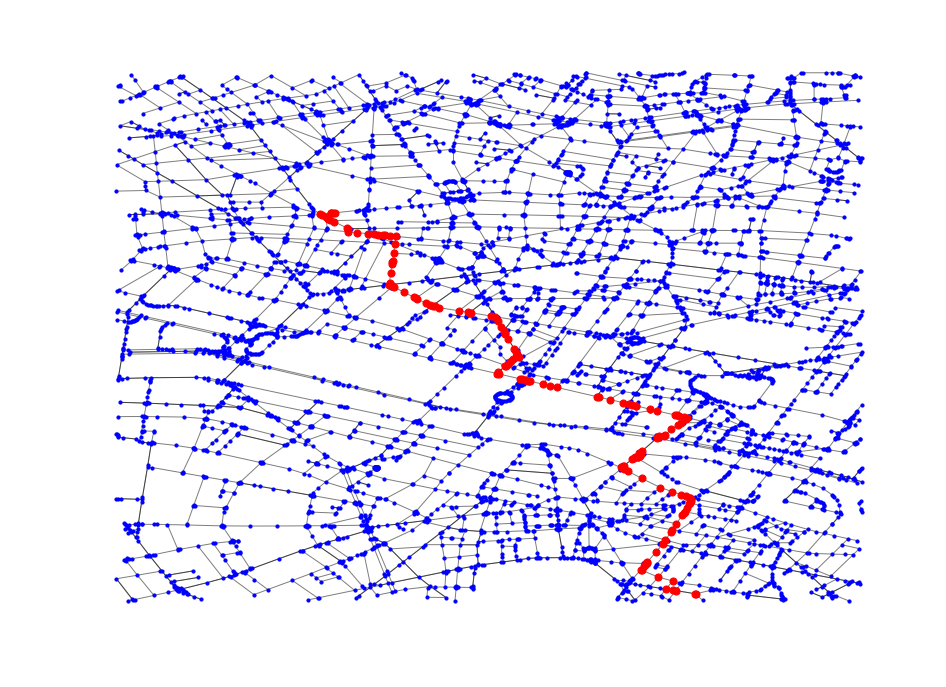

In [175]:
pantheon = 370
gare_saint_lazare = 4873

path = nx.shortest_path(G, pantheon, gare_saint_lazare, weight = 'weight')
print(path)
# Visualization
figure(figsize=(16,12))
axis('off')
nx.draw_networkx_nodes(G, pos, node_size = 10, node_color = 'b')
nx.draw_networkx_nodes(G, pos, nodelist = path, node_size = 50, node_color = 'r')
edges = nx.draw_networkx_edges(G, pos, arrows = False, alpha = 0.5)
show()

In [176]:
# To answer the question, use post_answer as above
get_question(3)

What is the length of this path (in meters)?
 (Enter an integer)


In [194]:
length = 0
for index in range(1,len(path)):
    length = length + G[path[index-1]][path[index]]['weight']
answer = length
print(length)
post_answer(3, answer)

4508
This is correct!


## OpenFlights

OpenFlights is the graph of the main international flights. Nodes are airports. The graph is undirected (all flights are bidirectional). Weights correspond to the number of daily flights between airports. Source: [Open Flight](http://openflights.org)

In [248]:
G = nx.read_graphml("openflights.graphml", node_type = int)

In [249]:
print(nx.info(G))

Name: openflight
Type: Graph
Number of nodes: 3097
Number of edges: 18193
Average degree:  11.7488


In [250]:
# Get node from (partial) name

def get_node_from_name(name):
    list_nodes = []
    for u in G.nodes():
        if G.node[u]['name'].find(name) >= 0:
            list_nodes.append(u)
    return list_nodes

for u in get_node_from_name('Charles de Gaulle'):
    print (u,G.node[u]['name'])
nodeRng = [u for ]

622 Charles de Gaulle International Airport


In [251]:
# Get positions
pos_x = nx.get_node_attributes(G,'pos_x')
pos_y = nx.get_node_attributes(G,'pos_y')
pos = {u: (pos_x[u], pos_y[u]) for u in G.nodes()}

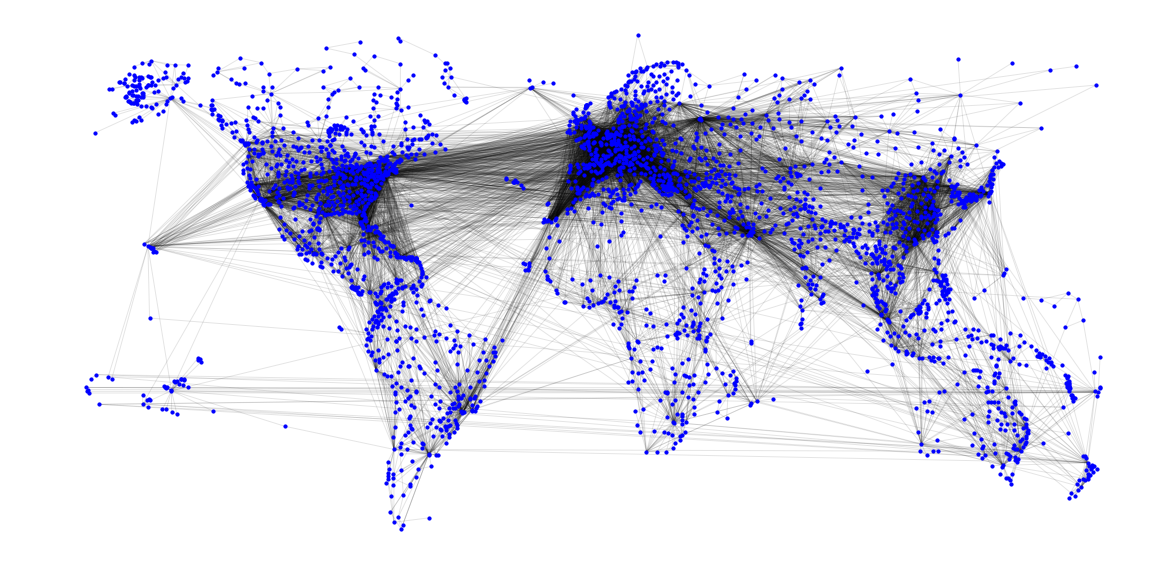

In [252]:
# Visualization
figure(figsize=(20,10))
axis('off')
nx.draw_networkx_nodes(G, pos, node_size = 10, node_color = 'b')
nx.draw_networkx_edges(G, pos, alpha = .1)
show()

## To do

* List the top-10 airports in number of flights and show them on the map
* Answer question #4 **(1 point)**

In [289]:
rng = dict()
totalWeight = 0
for u,v in G.edges():
    totalWeight = totalWeight + G[u][v]['weight']
    if u in rng:
        rng[u] = rng[u] + G[u][v]['weight']
    else:
        rng[u] = G[u][v]['weight']
    
    if v in rng:
        rng[v] = rng[v] + G[u][v]['weight']
    else:
        rng[v] = G[u][v]['weight']
        
# sorted_by_second = sorted(degrees, rng, reverse=True)
rng = sorted(rng.items(), key=itemgetter(1), reverse = True)

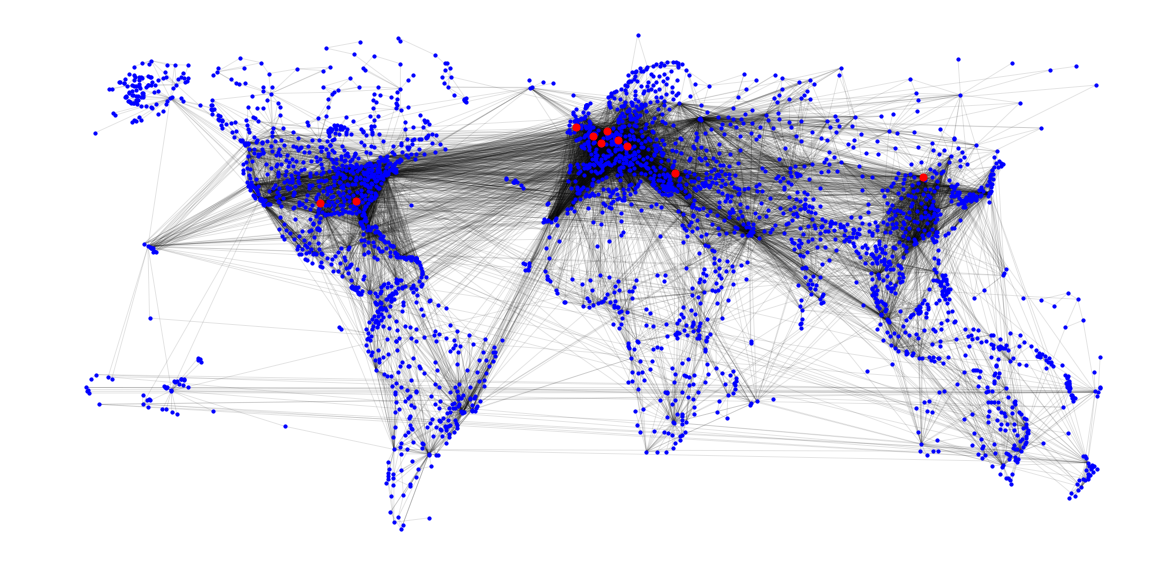

In [296]:
# Get positions
pos_x = nx.get_node_attributes(G,'pos_x')
pos_y = nx.get_node_attributes(G,'pos_y')
pos = {u: (pos_x[u], pos_y[u]) for u in G.nodes()}
figure(figsize=(20,10))
axis('off')
nx.draw_networkx_nodes(G, pos, node_size = 10, node_color = 'b')
nx.draw_networkx_edges(G, pos, alpha = .1)

topNode = [value[0] for value in rng]
nx.draw_networkx_nodes(G, pos, nodelist = topNode[:10]   , node_size = 50, node_color = 'r')
show()

In [ ]:
sumV = 0 
i = 0
weights = nx.get_edge_attributes(G, 'weight')
print(weights)

for end in range(1, len(rng)):
    comb = combinations(topNode[:end], 2)
    sumW = 0 
    for u,v in comb:
        if (u,v) in G.edges():
            sumW = sumW + G[u][v]['weight']
    if sumW > 0.5 * totalWeight:
        i = end

In [279]:
get_question(4)
post_answer(4, 197)

How many airports (in decreasing order of traffic) represent more than 50% of traffic?
 (Enter an integer)
This is correct!


# 3. Node and edge sampling

In the rest of the lab, we work on the OpenFlights dataset.

## To do

List:
* 10 random nodes 
* 10 random neighbors
* 10 random ends of random edges

In each case, show both the name of the airport and the degree of the corresponding node.

In [323]:
# Shuffling nodes
nodes = list(G.nodes())
np.random.shuffle(nodes)

rndNodes = [ (G.node[node]['name'], G.degree(node))  for node in nodes[:10]]
print(rndNodes)


[('Greater Rochester International Airport', 18), ('Zhob Airport', 2), ('Quaqtaq Airport', 2), ('Newport News Williamsburg International Airport', 5), ('Puerto Obaldia Airport', 1), ('Ngjiva Pereira Airport', 6), ('Rijeka Airport', 8), ('Grand Bahama International Airport', 10), ('Mohammed V International Airport', 85), ('Cascavel Airport', 3)]


In [308]:
# Shuffling edges
edges = list(G.edges())
np.random.shuffle(edges)
print (edges[0])

(313, 1413)


## To do 

* Answer questions #5 to #9 **(0.5 point each)** 
* Answer question #10 **(open answer)**

In [347]:
get_question(5)

x = [degree[1] for degree in G.degree()]

# print(np.sum(x) / lrn(G.nodes()))
print(nx.info(G))

post_answer(5,11.74898)

What is the mean degree of a random node?
 (Enter a float)
Name: openflight
Type: Graph
Number of nodes: 3097
Number of edges: 18193
Average degree:  11.7488
This is correct!


In [353]:
get_question(6)
post_answer(6, 57.26018528653671)

What is the mean degree of a random neighbor of a random node?
 (Enter a float)
This is correct!


In [358]:
get_question(7)
post_answer(7, 64.2738)

What is the mean degree of a random end of a random edge?
 (Enter a float)
This is correct!


In [354]:
get_question(8)
post_answer(8, 65.88412017167381)

What is the mean degree of a random neighbor of Charles de Gaulle airport?
 (Enter a float)
This is correct!


In [357]:
get_question(9)
r=nx.degree_assortativity_coefficient(G)
print(r)
post_answer(9,r)

What is the coefficient of correlation between the degrees of two neighbors?
 (Enter a float)
-0.02069797383893809
This is correct!


In [206]:
get_question(10)

Comment the results of questions #5 to #9.
 (Enter your answer below in English)
 (In case of multiple answers, only the last one is considered)


In [207]:
post_text(10)

Textarea(value='...')

Button(description='Send', style=ButtonStyle())

Answer posted
Answer posted
Answer posted


In [360]:
get_answer = connector.get_answer(5,5)

Review phase not started yet!
